# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [98]:
import numpy as np
import pandas as pd
from plotnine import (
    ggplot,
    geom_bar,
    aes,
    geom_histogram
    
)

In [15]:
# Import the titanic dataset here

add = "https://dlsun.github.io/pods/data/"
titanic = pd.read_csv(add + "titanic.csv")
print(titanic['class'].unique())
titanic.head()

['3rd' '2nd' '1st' 'engineering crew' 'victualling crew'
 'restaurant staff' 'deck crew']


,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [21]:
# Code here

titanic_pass = titanic[(titanic['class'] == '1st') | (titanic['class'] == '2nd') | (titanic['class'] == '3rd')]
titanic_ct = pd.crosstab(titanic_pass['class'], titanic_pass['embarked'])
titanic_ct


embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
A: 54%
* What proportion of Southampton passengers were in 3rd class?
A: 54%

In [74]:
# Code here

titanic_dist_emb = pd.crosstab(titanic_pass['class'], titanic_pass['embarked'], normalize = 'columns')
print(titanic_dist_emb)


titanic_dist_class = pd.crosstab(titanic_pass['class'], titanic_pass['embarked'], normalize = 'index')
print(titanic_dist_class)

embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481
embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

Visualization can tell different stories, depending how the graphs are shown, however, it can also be confusing as it can have a lot of different aspects on it. The pure numbers are straightforward and gie us accurate data, however, they take longer to read and understand.

C:\Users\tuke-\anaconda3\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 17'. Pick better value with 'binwidth'.


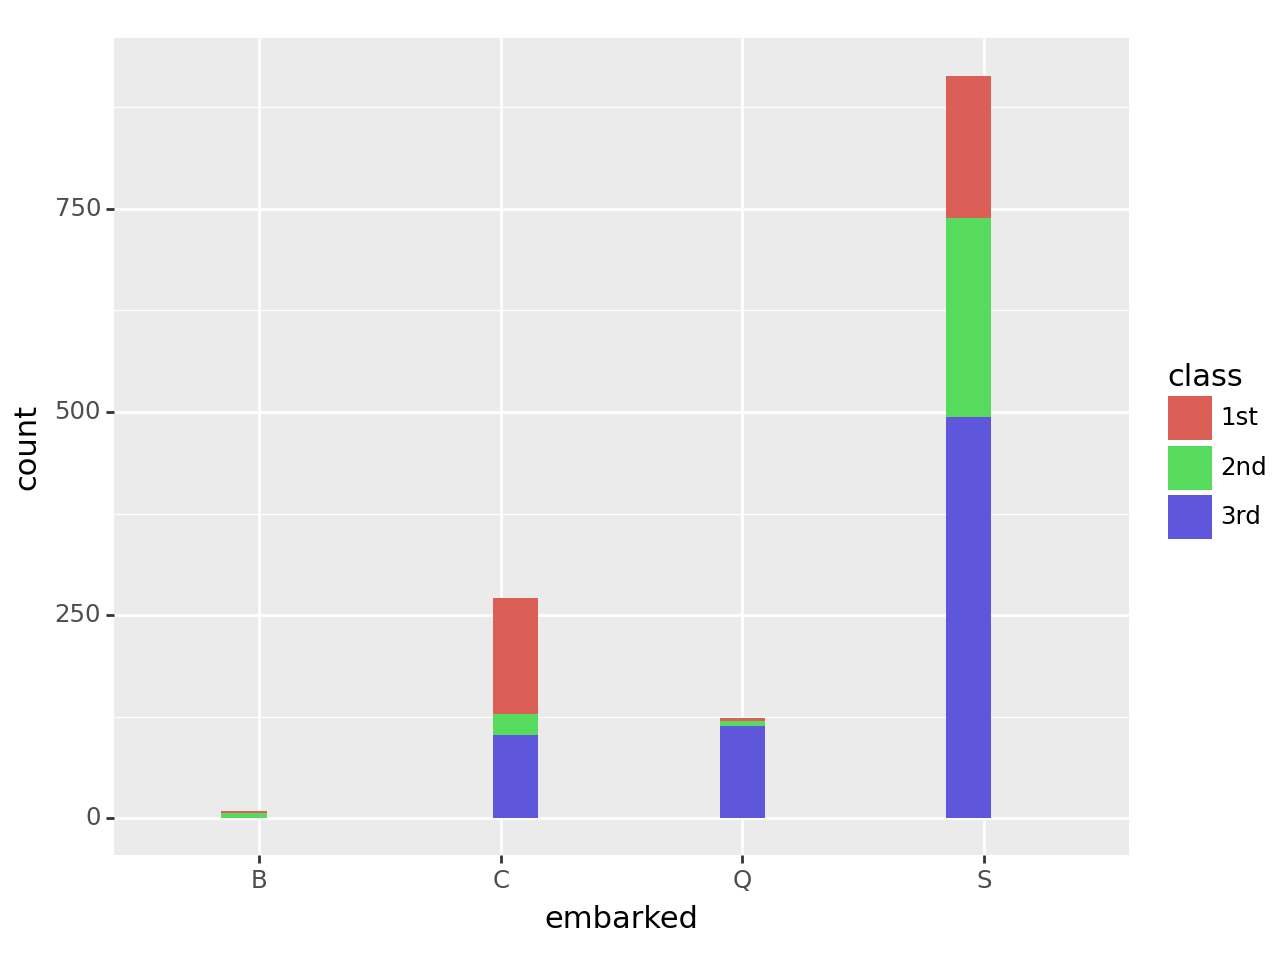

C:\Users\tuke-\anaconda3\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 11'. Pick better value with 'binwidth'.


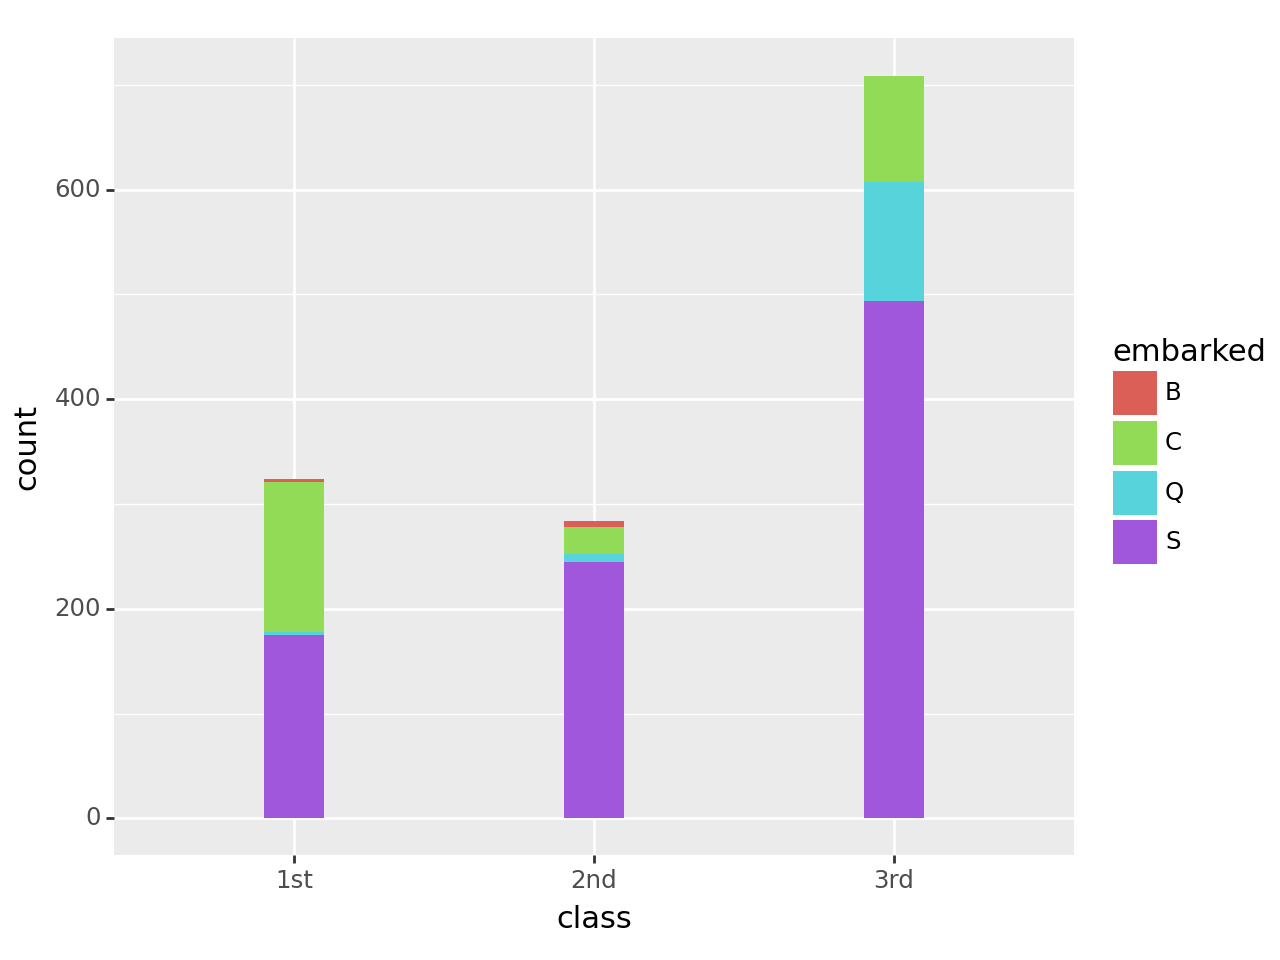

In [106]:
plot1 = (ggplot(titanic_pass, aes(x='embarked', fill = 'class')) +
     geom_histogram()    
)

plot2 = (ggplot(titanic_pass, aes(x='class', fill = 'embarked')) +
     geom_histogram()    
)

print(plot1)
print(plot2)

I missunderstood at first so here's my first graph since might as well.

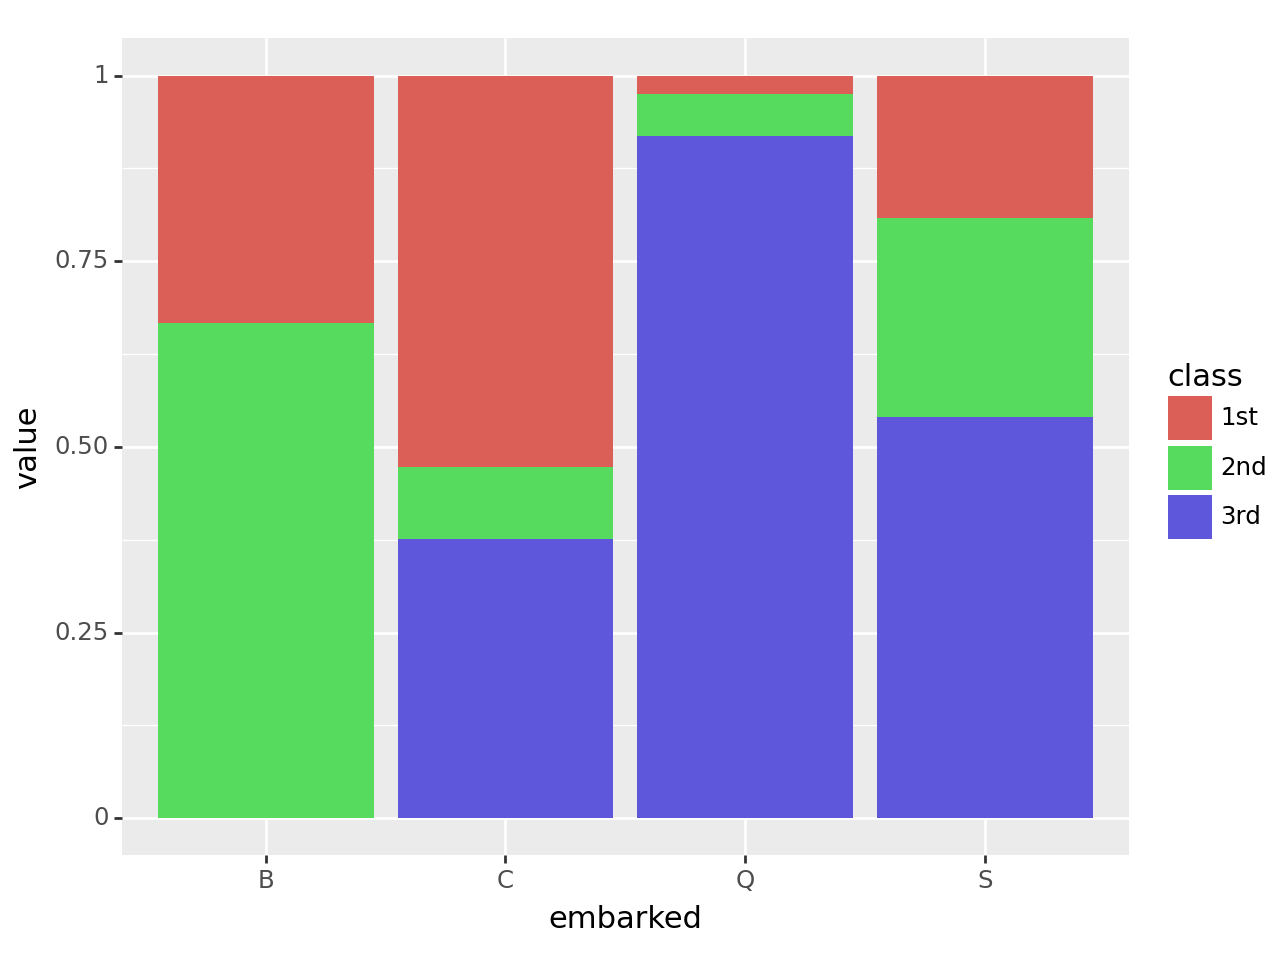

<Figure Size: (640 x 480)>

In [107]:
# Code here
# The crostable is not that usable for plotting so below we are first restting the index so the
# table only has the default leves. melt then makes it into a tidy table, however, it still needs
# to be grouped by the class identifier so we can reference properly.
titanic_graph = titanic_dist_emb.reset_index().melt(id_vars='class')

(ggplot(titanic_graph, aes(x='geography', y = 'value', fill = 'class')) +
     geom_bar(stat = 'identity')    
)